# Лабораторная работа №4. Синтез КИХ-фильтров.
Лаборатория цифровой обработки сигналов, МФТИ

$N=1$

In [1]:
def CompVariant(N):
    return N%6 + 6*(N%6==0)
Variant = CompVariant(7)
print(f"My variant is {Variant}")

My variant is 1


| Вариант                                                                	| 0    	| 1 	| 2 	| 3 	| 4 	| 5 	| 6 	|
|:------------------------------------------------------------------------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Частота дискретизации $f_s$ Гц                                         	| 2000	| 5000	| 5500	| 6000	| 6500	| 7000	| 7500	|
| граничная частота полосы пропускания $f_1$ Гц                          	| 450  	| 500 	| 650 	| 800 	| 950 	| 1100	| 1250	|
| граничная частота полосы задерживания $f_2$ Гц                         	| 550  	| 750 	| 925 	| 1100	| 1275	| 1450	| 1625	|
| максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  	| 0.1  	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	|
| максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ 	| 0.05 	| 0.02 	| 0.02	| 0.02	| 0.02	| 0.02	| 0.02	|

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
fontsize=18
plt.rcParams.update({'font.size': fontsize})

In [3]:
fs = 5000
f1 = 500
f2 = 750
delta1 = 0.05
delta2 = 0.02

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [4]:
@np.vectorize
def ideal_lowpass(f, fc, fs):
    if 0 <= f <= fc or fs-fc <= f <= fs:
        return 1.0 + 0.0j
    else:
        return 0.0 + 0.0j
@np.vectorize
def to_db(x):
    return 20*np.log10(x)

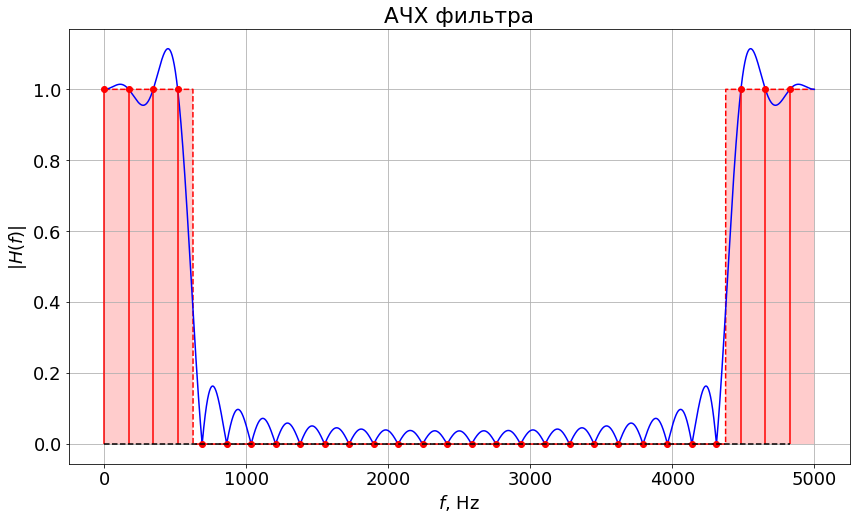

In [5]:
N=29
M = 10240
fc=(f1+f2)/2

fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.fill_between(f_band, abs(ideal_lowpass(f_band, fc=fc, fs=fs)),  alpha = 0.2, facecolor = 'red', )
plt.plot(f_band, abs(ideal_lowpass(f_band, fc=fc, fs=fs)), color='red', ls='--')

H = ideal_lowpass(fs*np.arange(N)/N, fc=fc, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
H1 = np.fft.fft(h, M)
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='r', basefmt = 'k--', markerfmt = 'ro')

plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.title('АЧХ фильтра')
plt.grid()
plt.show()

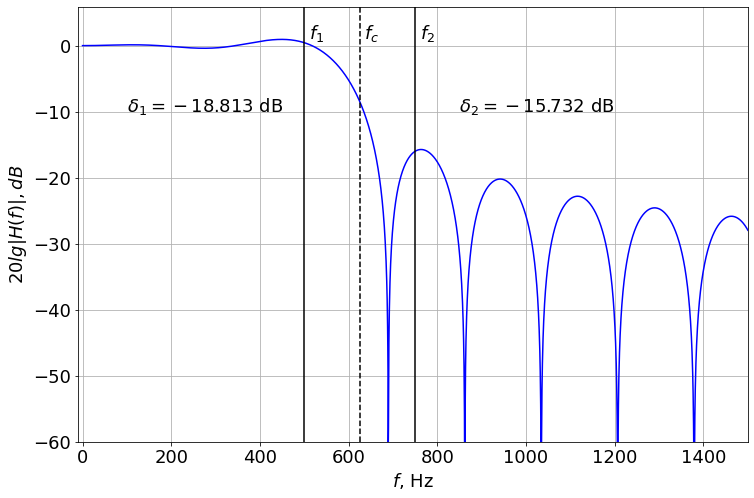

In [6]:
#%matplotlib notebook
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.plot(fs*(np.arange(M)/M), to_db(abs(H1)), color = 'blue')
plt.axvline(x=fc, ls='--', color='k')
plt.text(x=fc+10, y=1, s='$f_c$')
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+10, y=1, s='$f_1$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2+10, y=1, s='$f_2$')

my_delta_1 = to_db(max(abs(abs(H1[:int(f1/fs*M)])-1)))
plt.text(x=100, y=-10, s=f'$\delta_1={my_delta_1:.3f}$ dB')
my_delta_2 = max(to_db(abs(H1[int(f2/fs*M):M//2])))
plt.text(x=f2+100, y=-10, s=f'$\delta_2={my_delta_2:.3f}$ dB')

plt.xlim(xmin=-10,xmax=1500)
plt.ylim(ymin=-60)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

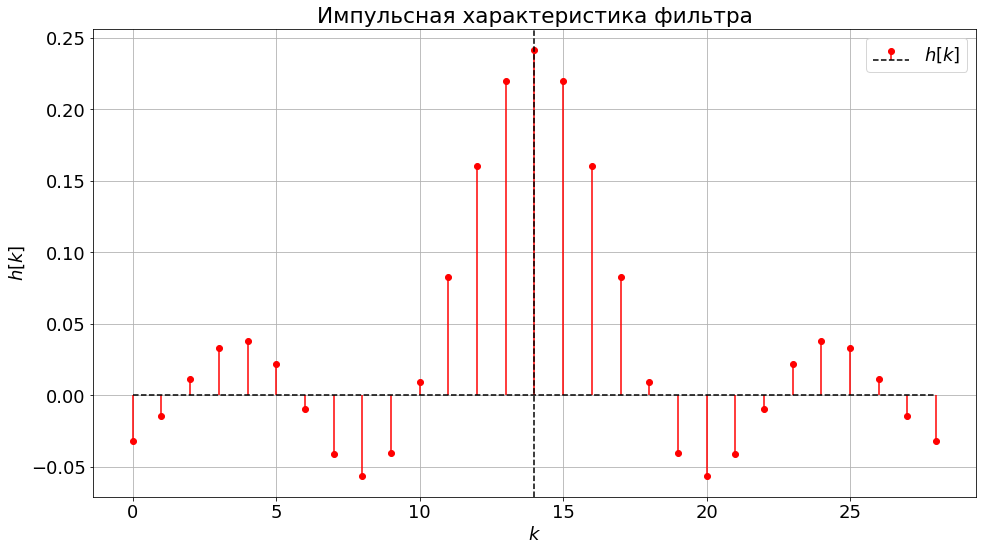

In [7]:
fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
plt.stem(np.arange(N), h.real, linefmt='r', basefmt='k--', markerfmt='ro', label="$h[k]$")
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')
plt.title('Импульсная характеристика фильтра')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

КИХ-фильтр I типа ($N = 29$ --- нечётное, $h[k]$ --- симметричная) 

$\Rightarrow$ групповая и фазовая задержки постоянные

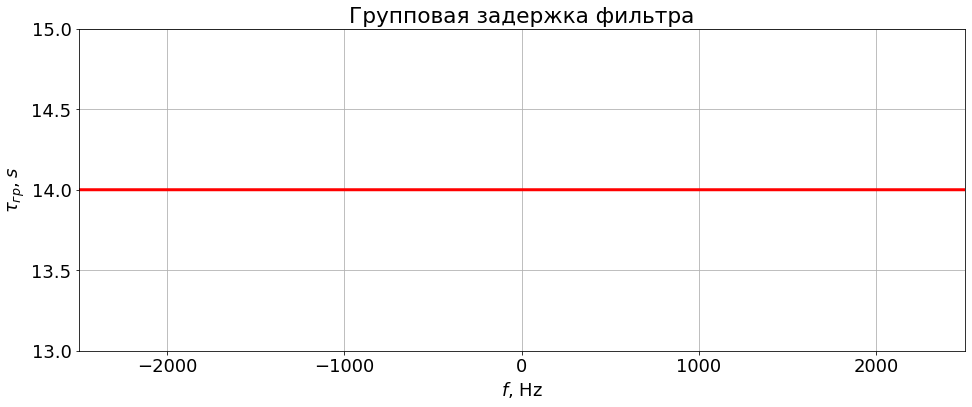

In [8]:
delta=1e-6
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('white')
plt.title('Групповая задержка фильтра')
plt.plot(nu*fs, gd, 'r', lw=3)
plt.ylabel('$\\tau_{{гр}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

Действительно, постоянная групповая задержка

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [9]:
@np.vectorize
def ideal_lowpass2(f, fs, f1, f2):
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0
    elif f1 < f < f2: 
        return f/(f1-f2)+(f2/(f2-f1))
    elif fs-f2 < f < fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1)
    else:
        return 0.0

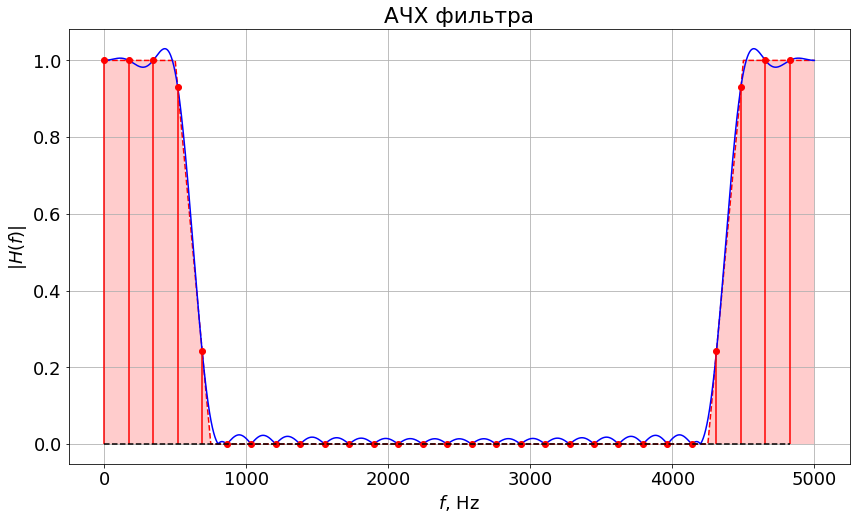

In [10]:
N=29
M = 10240

fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.fill_between(f_band, abs(ideal_lowpass2(f_band, f1=f1, f2=f2, fs=fs)),  alpha = 0.2, facecolor = 'red', )
plt.plot(f_band, abs(ideal_lowpass2(f_band, f1=f1, f2=f2, fs=fs)), color='red', ls='--')

H = ideal_lowpass2(fs*np.arange(N)/N, f1=f1, f2=f2, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
H1 = np.fft.fft(h, M)
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='r', basefmt = 'k--', markerfmt = 'ro')

plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.title('АЧХ фильтра')
plt.grid()
plt.show()

<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)


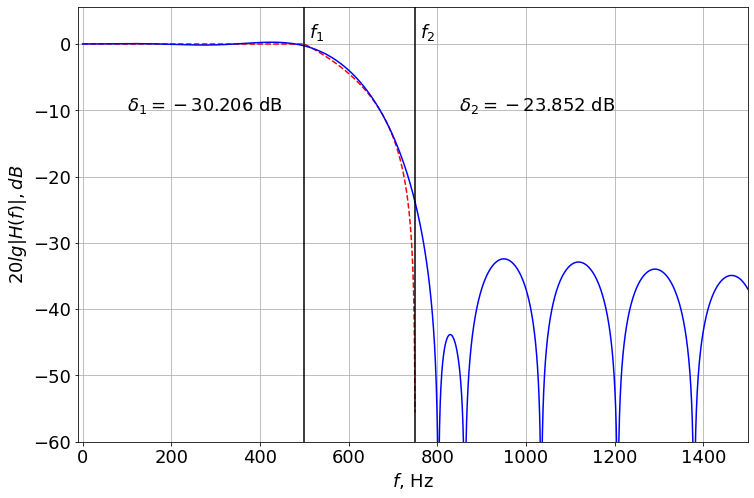

In [11]:
#%matplotlib notebook
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.plot(f_band, to_db(abs(ideal_lowpass2(f_band, f1=f1, f2=f2, fs=fs))), color='red', ls='--')
plt.plot(fs*(np.arange(M)/M), to_db(abs(H1)), color = 'blue')
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+10, y=1, s='$f_1$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2+10, y=1, s='$f_2$')

my_delta_1 = to_db(max(abs(abs(H1[:int(f1/fs*M)])-1)))
plt.text(x=100, y=-10, s=f'$\delta_1={my_delta_1:.3f}$ dB')
my_delta_2 = max(to_db(abs(H1[int(f2/fs*M):M//2])))
plt.text(x=f2+100, y=-10, s=f'$\delta_2={my_delta_2:.3f}$ dB')

plt.xlim(xmin=-10,xmax=1500)
plt.ylim(ymin=-60)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)
<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)


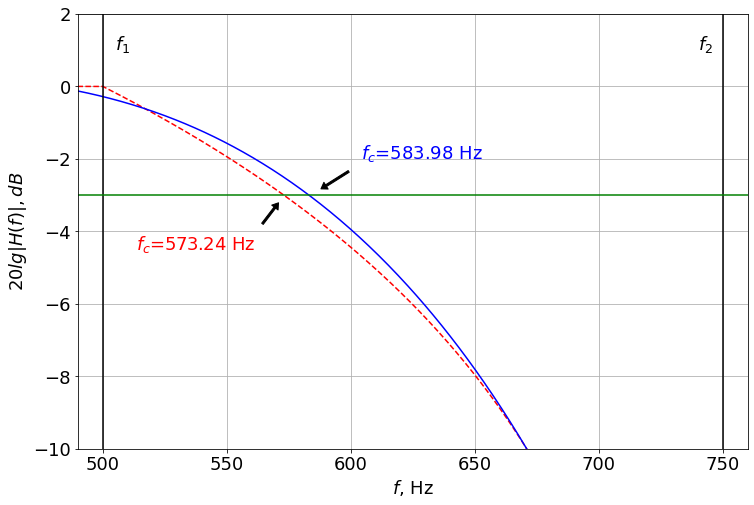

In [12]:
#%matplotlib notebook
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.plot(f_band, to_db(abs(ideal_lowpass2(f_band, f1=f1, f2=f2, fs=fs))), color='red', ls='--', label="ideal filter")
plt.plot(fs*(np.arange(M)/M), to_db(abs(H1)), color = 'blue', label="real filter")
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+5, y=1, s='$f_1$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2-10, y=1, s='$f_2$')

plt.axhline(y=-3, ls='-', color='green')
Hi_db = to_db(abs(ideal_lowpass2(f_band, f1=f1, f2=f2, fs=fs)))
arrowprops=dict(facecolor='black', width=2, headwidth=8, headlength=6, shrink=0.2)
fc_ideal = (np.argmin(Hi_db[Hi_db>-3])+1) * fs / M
plt.annotate(xytext=(fc_ideal-60, -4.5), xy=(fc_ideal, -3), 
             text=fr'$f_c$={fc_ideal:.2f} Hz', color='r', arrowprops=arrowprops)
Hr_db = to_db(abs(H1))
fc_real = (np.argmin(Hr_db[Hr_db>-3])+1) * fs / M
plt.annotate(xytext=(fc_real+20, -2), xy=(fc_real, -3), 
             text=fr'$f_c$={fc_real:.2f} Hz', color='b', arrowprops=arrowprops)

plt.xlim(xmin=f1-10,xmax=f2+10)
plt.ylim(ymax=2,ymin=-10)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

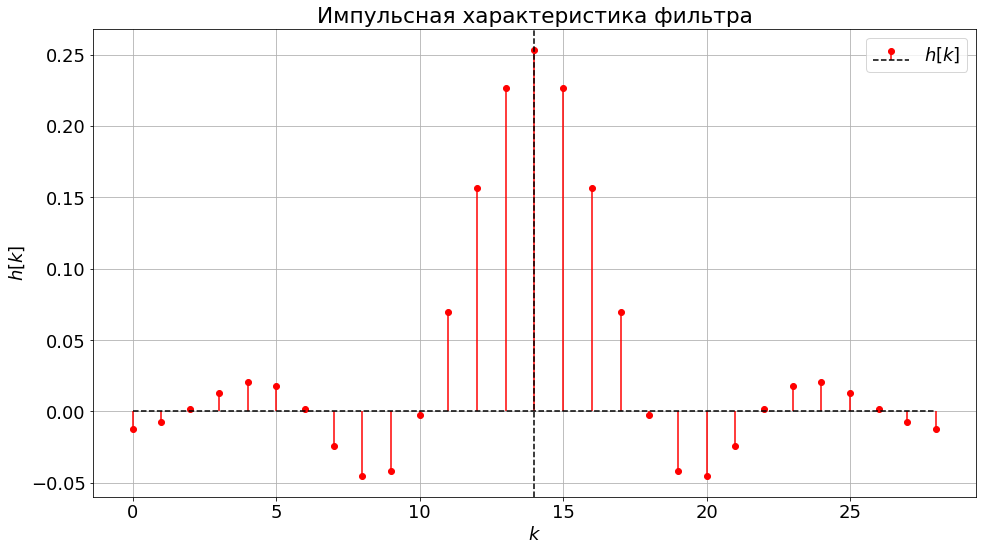

In [13]:
fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
plt.stem(np.arange(N), h.real, linefmt='r', basefmt='k--', markerfmt='ro', label="$h[k]$")
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')
plt.title('Импульсная характеристика фильтра')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

КИХ-фильтр I типа ($N = 29$ --- нечётное, $h[k]$ --- симметричная) 

$\Rightarrow$ групповая и фазовая задержки постоянные

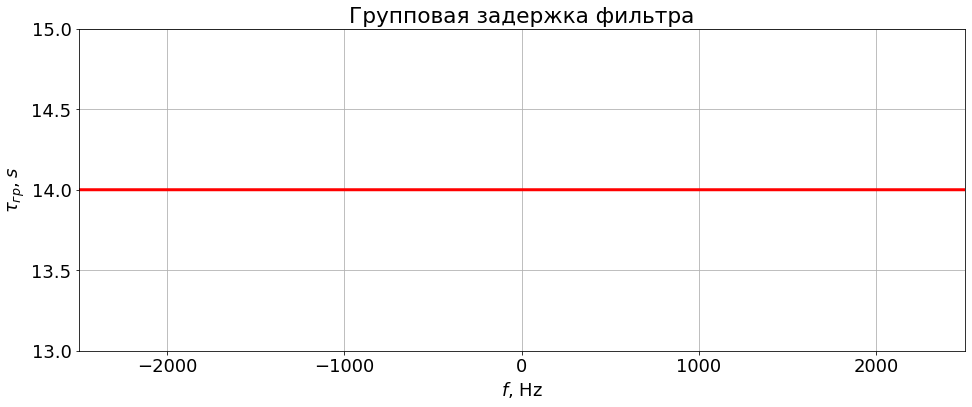

In [14]:
delta=1e-6
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('white')
plt.title('Групповая задержка фильтра')
plt.plot(nu*fs, gd, 'r', lw=3)
plt.ylabel('$\\tau_{{гр}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

## Задача 1.3*. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| > (1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [15]:
@np.vectorize
def ideal_rc(f, beta, fc, fs):
    if f > 0.5*fs:
        f = fs - f
    if abs(f) <= (1 - beta) * fc:
        return 1.0
    elif abs(f) > (1 + beta) * fc: 
        return 0.0
    else:
        return 0.5 * (1 + np.cos(np.pi*(abs(f) - (1-beta)*fc)/(2*beta*fc)))

<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)
<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)


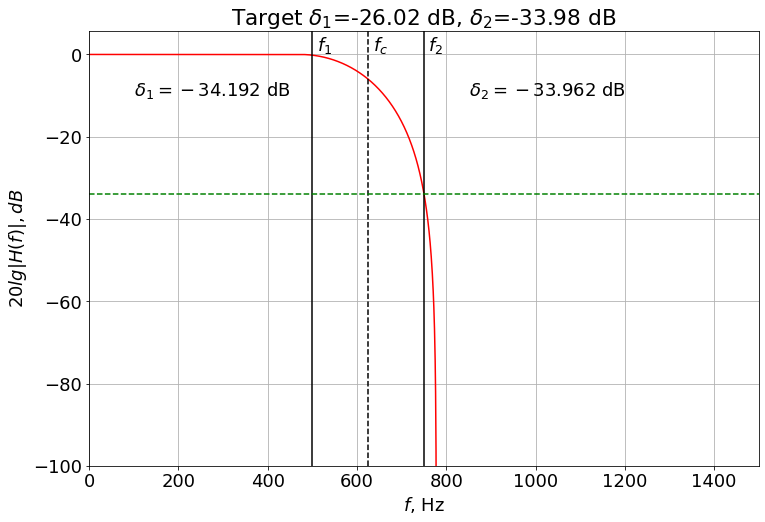

In [16]:
#%matplotlib notebook
N=29
M = 10240
fc=(f1+f2)/2
beta=0.2443

fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
H_rc = abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs))
plt.plot(f_band, to_db(H_rc), color='red', ls='-')
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+10, y=1, s='$f_1$')
plt.axvline(x=fc, ls='--', color='k')
plt.text(x=fc+10, y=1, s='$f_c$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2+10, y=1, s='$f_2$')


plt.axhline(y=to_db(delta2), ls='--', color='g')
my_delta_1 = to_db(max(abs(H_rc[:int(f1/fs*M)]-1)))
plt.text(x=100, y=-10, s=f'$\delta_1={my_delta_1:.3f}$ dB')
my_delta_2 = max(to_db(abs(H_rc[int(f2/fs*M):M//2])))
plt.text(x=f2+100, y=-10, s=f'$\delta_2={my_delta_2:.3f}$ dB')

plt.xlim(xmin=0,xmax=1500)
plt.ylim(ymin=-100)
plt.title(f"Target $\delta_1$={to_db(delta1):.2f} dB, $\delta_2$={to_db(delta2):.2f} dB")
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

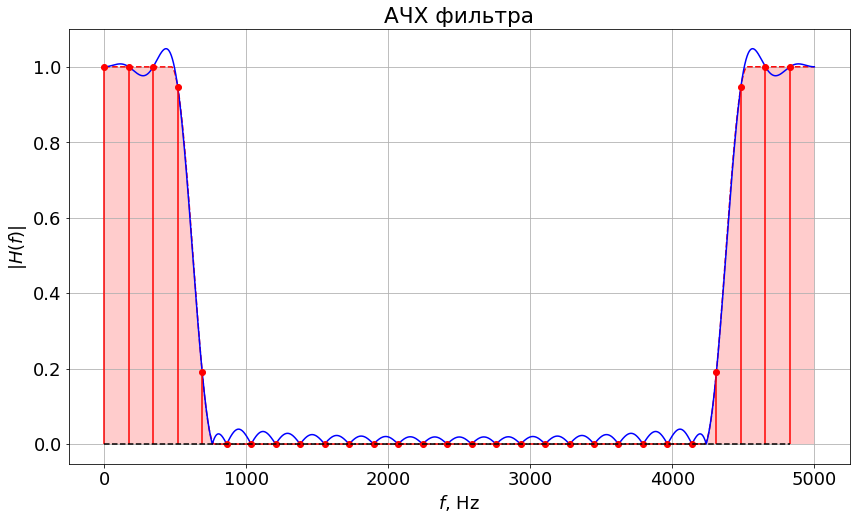

In [17]:
fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.fill_between(f_band, abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs)),  alpha = 0.2, facecolor = 'red', )
plt.plot(f_band, abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs)), color='red', ls='--')

H = ideal_rc(fs*np.arange(N)/N, beta=beta, fc=fc, fs=fs)
h = np.roll(np.fft.ifft(H), N//2)
H1 = np.fft.fft(h, M)
plt.plot(fs*(np.arange(M)/M), abs(H1), color = 'blue')
plt.stem(fs*np.arange(N)/N, abs(H), linefmt='r', basefmt = 'k--', markerfmt = 'ro')

plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")
plt.title('АЧХ фильтра')
plt.grid()
plt.show()

<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)


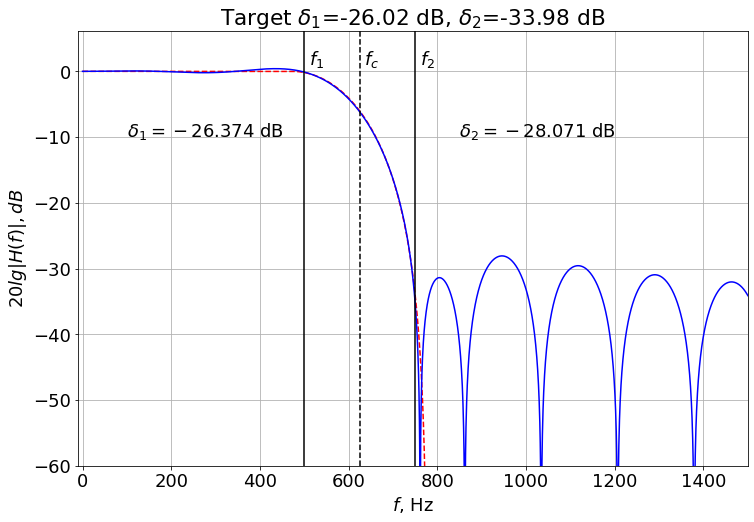

In [18]:
#%matplotlib notebook
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
f_band = np.linspace(0, fs, M)
plt.plot(f_band, to_db(abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs))), color='red', ls='--')
plt.plot(fs*(np.arange(M)/M), to_db(abs(H1)), color = 'blue')
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+10, y=1, s='$f_1$')
plt.axvline(x=fc, ls='--', color='k')
plt.text(x=fc+10, y=1, s='$f_c$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2+10, y=1, s='$f_2$')

my_delta_1 = to_db(max(abs(abs(H1[:int(f1/fs*M)])-1)))
plt.text(x=100, y=-10, s=f'$\delta_1={my_delta_1:.3f}$ dB')
my_delta_2 = max(to_db(abs(H1[int(f2/fs*M):M//2])))
plt.text(x=f2+100, y=-10, s=f'$\delta_2={my_delta_2:.3f}$ dB')

plt.xlim(xmin=-10,xmax=1500)
plt.ylim(ymin=-60)
plt.title(f"Target $\delta_1$={to_db(delta1):.2f} dB, $\delta_2$={to_db(delta2):.2f} dB")
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

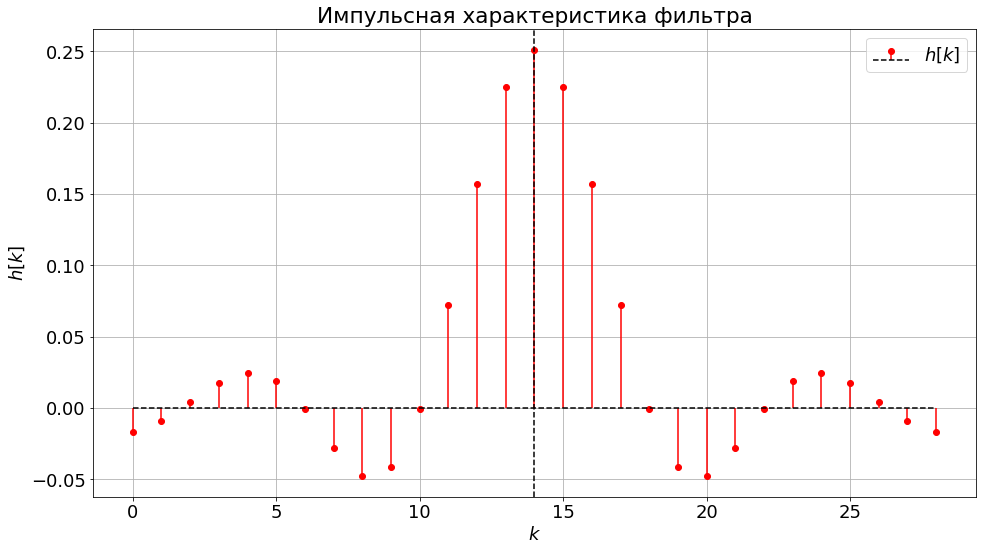

In [19]:
fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
plt.stem(np.arange(N), h.real, linefmt='r', basefmt='k--', markerfmt='ro', label="$h[k]$")
plt.axvline(N//2, ls = '--', color = 'black')
    
plt.grid()
plt.ylabel('$h[k]$')
plt.xlabel('$k$')
plt.title('Импульсная характеристика фильтра')

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

КИХ-фильтр I типа ($N = 29$ --- нечётное, $h[k]$ --- симметричная) 

$\Rightarrow$ групповая и фазовая задержки постоянные

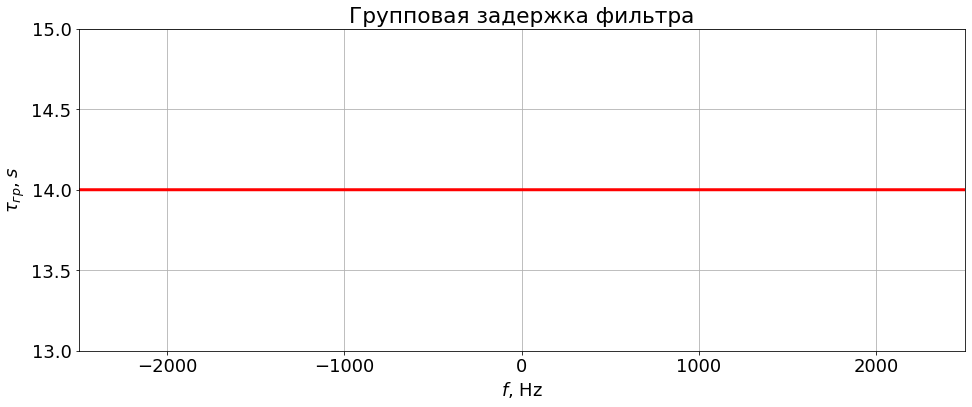

In [20]:
delta=1e-6
nu, gd = signal.group_delay((h.real, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=fs)

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('white')
plt.title('Групповая задержка фильтра')
plt.plot(nu*fs, gd, 'r', lw=3)
plt.ylabel('$\\tau_{{гр}}, s$')
plt.xlabel('$f$, Hz')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xlim(-fs/2, fs/2)
plt.grid()
plt.tight_layout()

<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)
<ipython-input-4-e02d993f5495>:9: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(x)


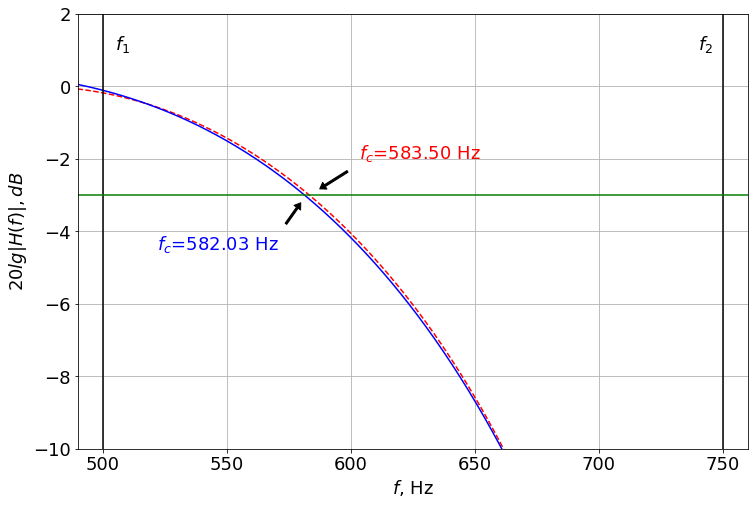

In [21]:
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.plot(f_band, to_db(abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs))), color='red', ls='--', label="ideal filter")
plt.plot(fs*(np.arange(M)/M), to_db(abs(H1)), color = 'blue', label="real filter")
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+5, y=1, s='$f_1$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2-10, y=1, s='$f_2$')

plt.axhline(y=-3, ls='-', color='green')
Hi_db = to_db(abs(ideal_rc(f_band, beta=beta, fc=fc, fs=fs)))
arrowprops=dict(facecolor='black', width=2, headwidth=8, headlength=6, shrink=0.2)
fc_ideal = (np.argmin(Hi_db[Hi_db>-3])+1) * fs / M
plt.annotate(xytext=(fc_ideal+20, -2), xy=(fc_ideal, -3), 
             text=fr'$f_c$={fc_ideal:.2f} Hz', color='r', arrowprops=arrowprops)
Hr_db = to_db(abs(H1))
fc_real = (np.argmin(Hr_db[Hr_db>-3])+1) * fs / M
plt.annotate(xytext=(fc_real-60, -4.5), xy=(fc_real, -3), 
             text=fr'$f_c$={fc_real:.2f} Hz', color='b', arrowprops=arrowprops)

plt.xlim(xmin=f1-10,xmax=f2+10)
plt.ylim(ymax=2,ymin=-10)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.show()

#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу.

|Окно, применяемое для синтеза фильтра |Частота среза, по уровню -3дБ, Гц |Максимальный уровень пульсаций, дБ | Ширина переходной зоны, Гц |
|:-------:|:-|:-|:-|
|Дирихле  |593.75|-19.8|141|
|Ханна    |548.34|-43.9|500|
|Хэмминга |554.69|-51.9|536|
|Блэкмана |532.71|-74.9|910|



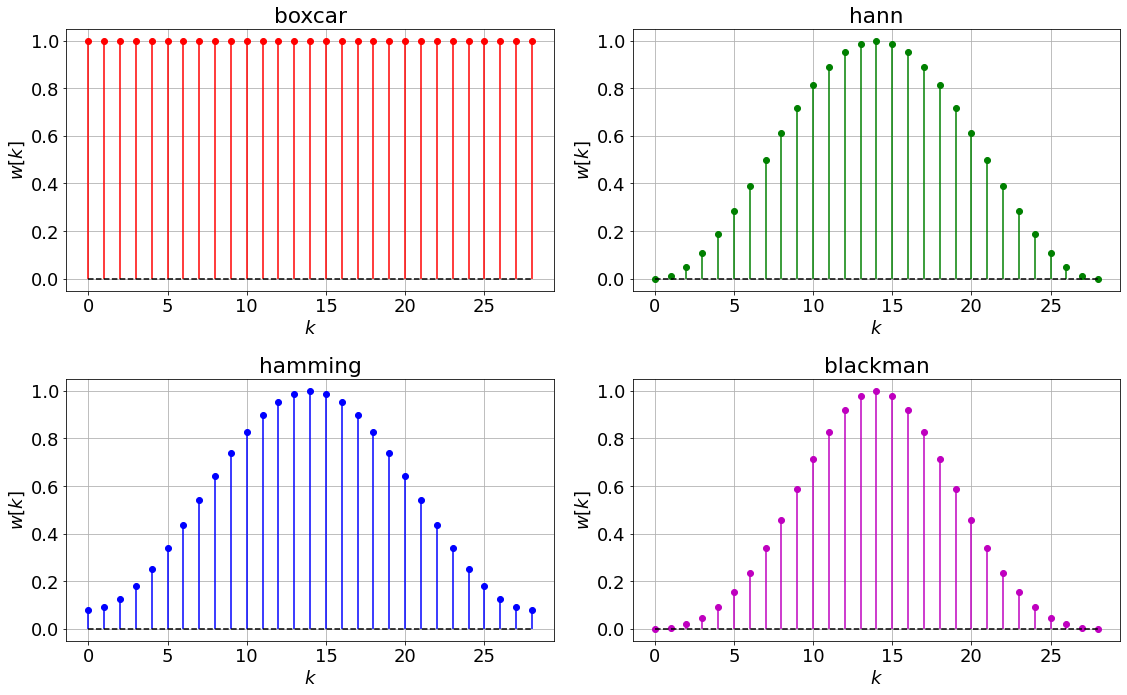

In [22]:
N = 29
fc=(f1+f2)/2
colors={'boxcar':'r', 'hann':'g', 'hamming':'b', 'blackman':'m'}

fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    plt.subplot(2, 2, i+1)
    w = signal.get_window(window=window, Nx=N, fftbins=False)
    plt.stem(np.arange(N), w, linefmt=colors[window], basefmt = 'k--', markerfmt = colors[window]+'o')
    plt.grid()
    plt.title(window)
    plt.ylabel('$w[k]$')
    plt.xlabel('$k$')
    plt.tight_layout()
plt.show()

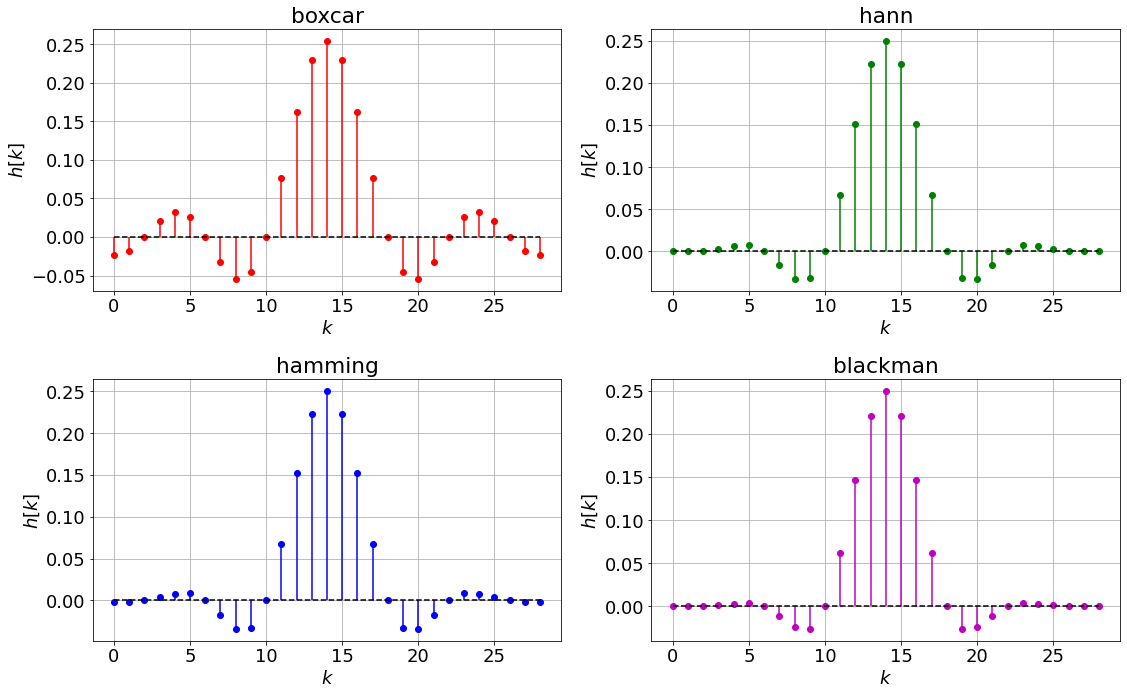

In [23]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    plt.subplot(2, 2, i+1)
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    plt.stem(np.arange(N), h, linefmt=colors[window], basefmt = 'k--', markerfmt = colors[window]+'o')
    plt.grid()
    plt.title(window)
    plt.ylabel('$h[k]$')
    plt.xlabel('$k$')
    plt.tight_layout()
plt.show()

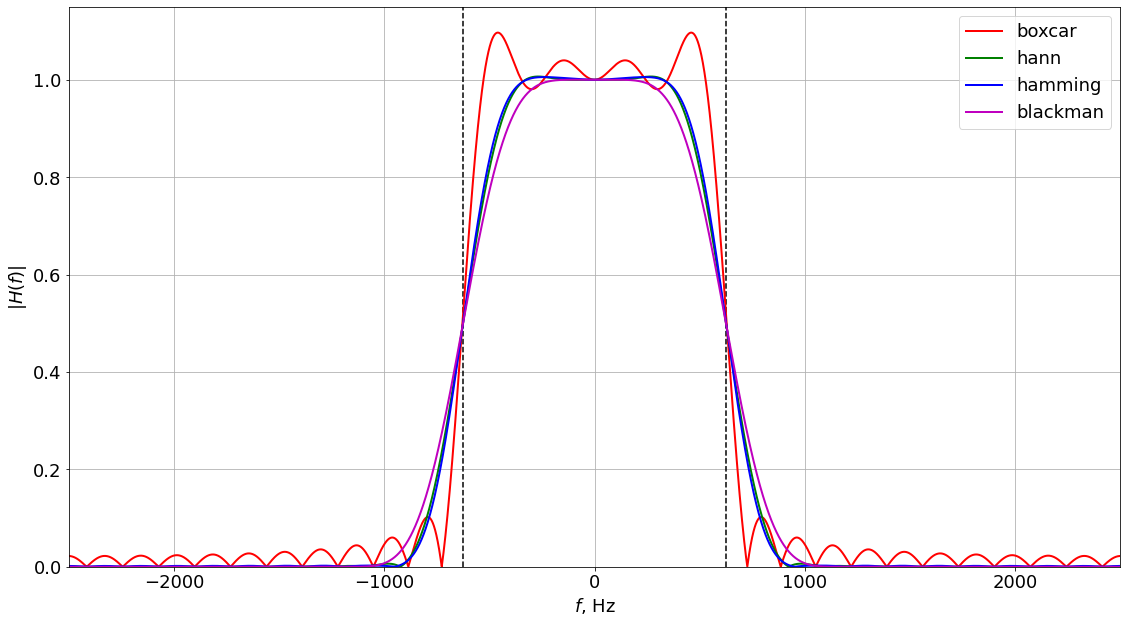

In [24]:
M=10240
f_band = fs*(np.arange(M)/M-0.5)

fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')
plt.axvline(fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')
for window in ['boxcar', 'hann', 'hamming', 'blackman']:
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(f_band, H, lw=2, label=window, color=colors[window])
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('$f$, Hz')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.15])
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


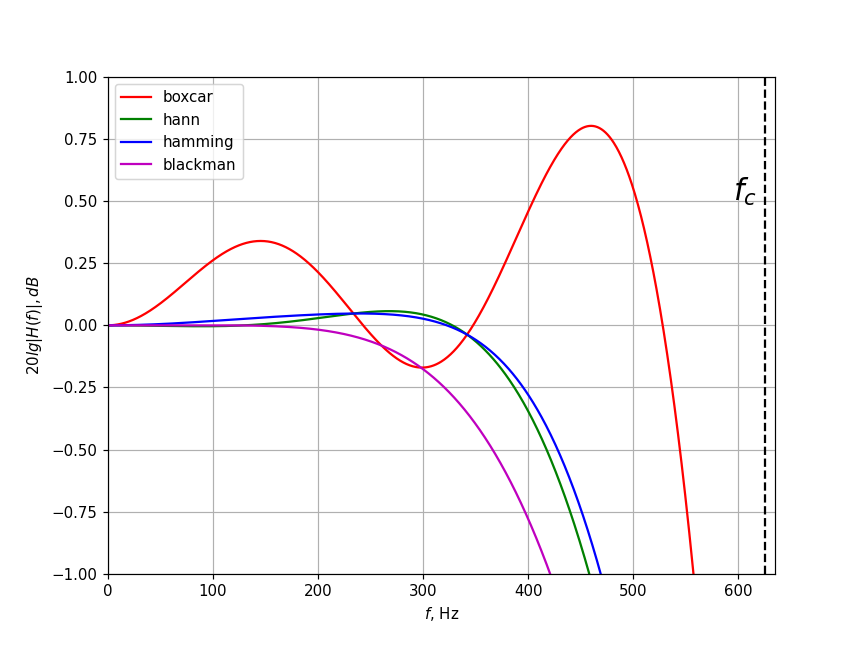

In [25]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')

# plt.axvline(x=f1, ls='-', color='k')
# plt.text(x=f1+10, y=1, s='$f_1$')
plt.axvline(x=fc, ls='--', color='k')
plt.text(x=fc-30, y=0.5, s='$f_c$', fontsize=20)
# plt.axvline(x=f2, ls='-', color='k')
# plt.text(x=f2+10, y=1, s='$f_2$')
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(f_band, to_db(H), color=colors[window], ls='-', label=window)
#     print("__"+window+"__")
#     my_delta_1 = to_db(max(abs(abs(H[M//2:M//2+int(f1/fs*M)])-1)))
#     print(f"delta_1={my_delta_1}")
#     plt.text(x=20, y=-10-7*i, s=f'$\delta_1={my_delta_1:.3f}$ dB', color=colors[window])
#     my_delta_2 = max(to_db(abs(H[M//2+int(f2/fs*M):M])))
#     print(f"delta_2={my_delta_2}")
#     plt.text(x=f2+180, y=-7*i, s=f'$\delta_2={my_delta_2:.3f}$ dB', color=colors[window])

plt.xlim(xmin=0,xmax=fc+10)
plt.ylim(ymax=1, ymin=-1)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


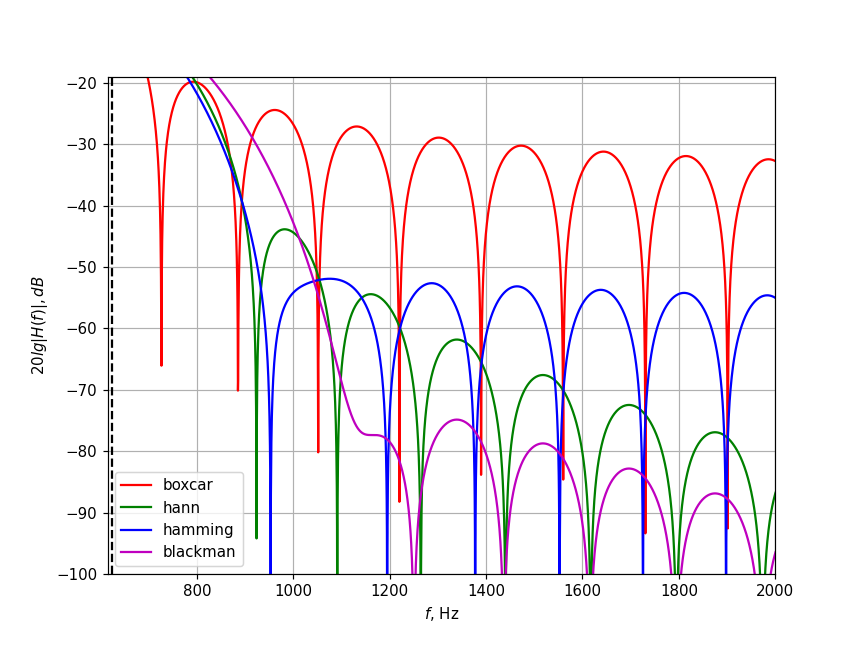

In [26]:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('white')

plt.axvline(x=fc, ls='--', color='k')
plt.text(x=fc+10, y=1, s='$f_c$')

for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(f_band, to_db(H), color=colors[window], ls='-', label=window)

plt.xlim(xmin=fc-10,xmax=2000)
plt.ylim(ymax=-19, ymin=-100)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.legend()
plt.grid()
plt.show()

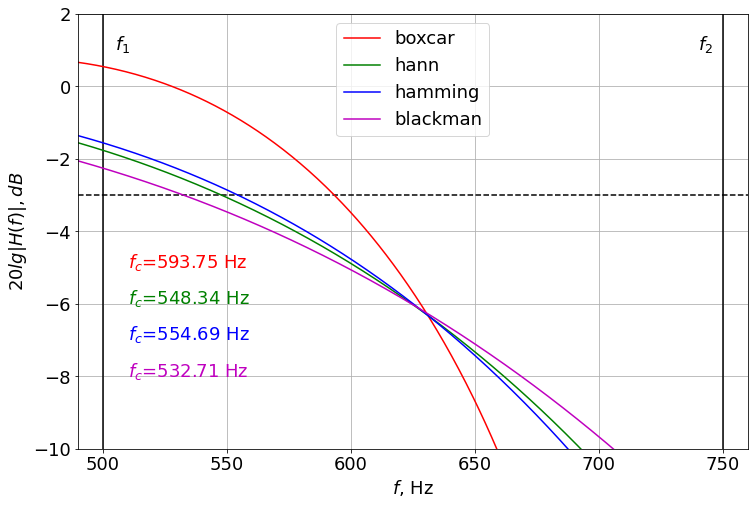

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': fontsize})

fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
plt.axvline(x=f1, ls='-', color='k')
plt.text(x=f1+5, y=1, s='$f_1$')
plt.axvline(x=f2, ls='-', color='k')
plt.text(x=f2-10, y=1, s='$f_2$')
plt.axhline(y=-3, ls='--', color='k')
for i, window in enumerate(['boxcar', 'hann', 'hamming', 'blackman']):
    h = signal.firwin(numtaps=N, cutoff=fc, width=None, window=window, pass_zero='lowpass', fs=fs)
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(f_band, to_db(H), color=colors[window], ls='-', label=window)

    H_db = to_db(H[M//2:-1])
    fc_3db = (np.argmin(H_db[H_db>-3])+1) * fs / M
    plt.annotate(xytext=(f1+10, -5-i), xy=(fc_3db, -3), 
                 text=fr'$f_c$={fc_3db:.2f} Hz', color=colors[window], arrowprops=None)

plt.xlim(xmin=f1-10,xmax=f2+10)
plt.ylim(ymax=2,ymin=-10)
plt.xlabel("$f$, Hz")
plt.ylabel("$20lg|H(f)|, dB$")
plt.grid()
plt.legend()
plt.show()

### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

In [28]:
N_1 = int(2*np.ceil(3.3*fs/(f2 - f1)/2)+1)
fс = (f1+f2)/2
print(f"N = {N_1}")
print(f"f_c = {fc}")

N = 67
f_c = 625.0


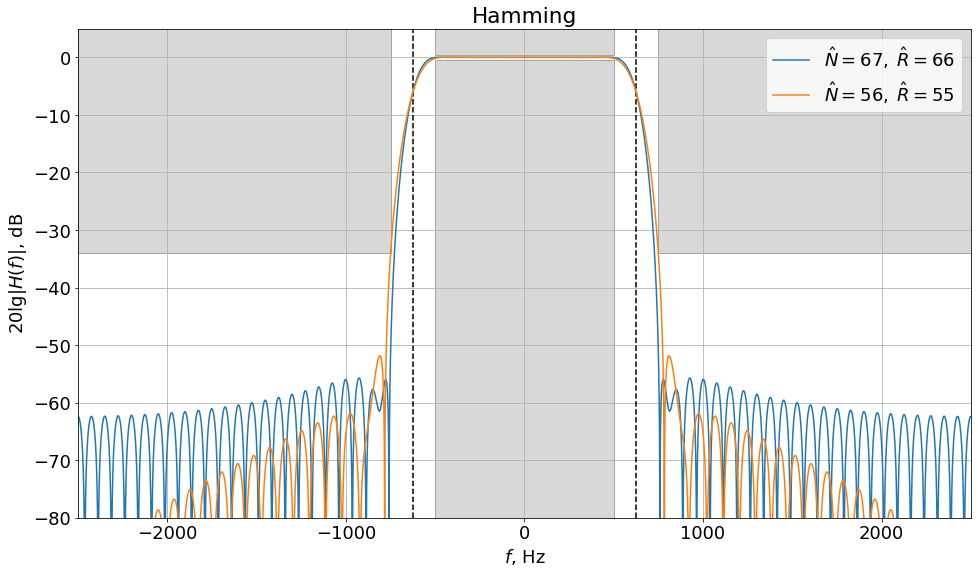

In [29]:
#%matplotlib notebook

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': fontsize})

M=10240
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')
plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

for N in [N_1, 56]:
    h = signal.firwin(numtaps=N, cutoff=fс, window='hamming', pass_zero='lowpass', fs=fs)
    H=abs(np.fft.fftshift(np.fft.fft(h, M)))
    plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), label = f'$\hatN = {N},\; \hatR = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')

plt.title("Hamming")
plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

Окно Кайзера
$$w[k]=\left\{ \begin{matrix}
   \dfrac{{{I}_{0}}\left( \beta \sqrt{1-{{\left( \dfrac{2k}{N-1} \right)}^{2}}} \right)}{{{I}_{0}}(\beta )}, & \ \ 0\le k\le N-1;  \\
   0 & \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$
где 
* $N$ — длина окна, порядок фильтра $R=N-1$  определяют по эмпирической формуле 
$$R=\left[ \dfrac{{{a}_{\min }}-7,95}{2,285\Delta \theta } \right], $$ где
* * ${{a}_{\min }}$– минимальное заданное затухание КИХ-фильтра в дБ,
* * $\Delta \theta $ - ширина полосы перехода.
* $I_0 (x)$ — модифицированная функция Бесселя первого рода нулевого порядка, которая может быть вычислена с помощью быстро сходящегося степенного ряда (обычно достаточно $L<25$)
$${{I}_{0}}(x)=1+\underset{m=1}{\overset{L}{\mathop \sum }}\,{{\left( \frac{{{\left( x/2 \right)}^{m}}}{m!} \right)}^{2}}$$
* $\beta$ — параметр окна Кайзера, определяемой по эмпирической формуле




$$\beta=\left\{ \begin{matrix}
   0,1102({{a}_{\min }}-8,7), & {{a}_{\min }}>50;  \\
   0.5842{{({{a}_{\min }}-21)}^{0.4}}+0.07886({{a}_{\min }}-21), & 21\le {{a}_{\min }}\le 50;  \\
   0 & {{a}_{\min }}<21.  \\
\end{matrix} \right.$$

In [30]:
print(f"N = {1+int(np.ceil((-20*np.log10(delta2) - 7.95) * 0.5*fs/(2.285 * np.pi * (f2 - f1))))}")
print(f"beta = {0.5842*(-20*np.log10(delta2)-21)**0.4 + 0.07886*(-20*np.log10(delta2)-21)}")

N = 38
beta = 2.652339138368929


In [31]:
N, beta = signal.kaiserord(ripple=-20*np.log10(delta2), width=2*(f2-f1)/fs)
print(f"N = {N}")
print(f"beta = {beta}")

N = 38
beta = 2.652339138368929


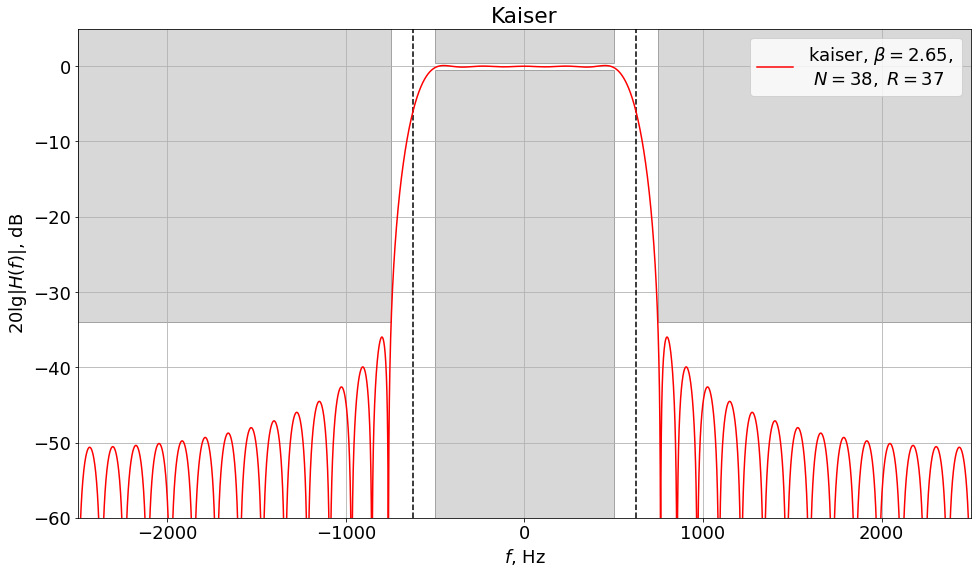

In [32]:
fc=(f1+f2)/2

M=10240
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')

plt.axvline(+fc, ls = '--', color = 'black')
plt.axvline(-fc, ls = '--', color = 'black')

h = signal.firwin(numtaps=N, cutoff=fc, window=('kaiser', beta), pass_zero='lowpass', fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), color='red', label = f'kaiser, $\\beta = {beta:.2f}$, \n $N = {N},\; R = {N-1}$')


plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.title("Kaiser")
plt.ylim(-60, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

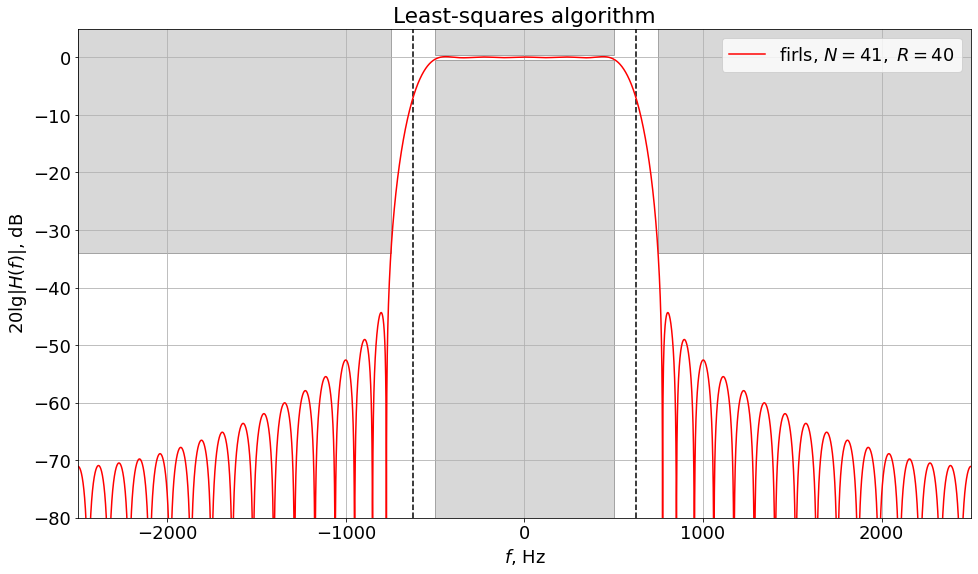

In [33]:
#%matplotlib notebook
fс = (f1+f2)/2
M = 10240
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')

plt.axvline(+fс, ls = '--', color = 'black')
plt.axvline(-fс, ls = '--', color = 'black')

bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 1, 0, 0])
weight = np.array([1/delta1, 1/delta2])
# N = 41 min
N = 41
h = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), color='red', label = f'firls, $N = {N},\; R = {N-1}$')

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.title("Least-squares algorithm")
plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

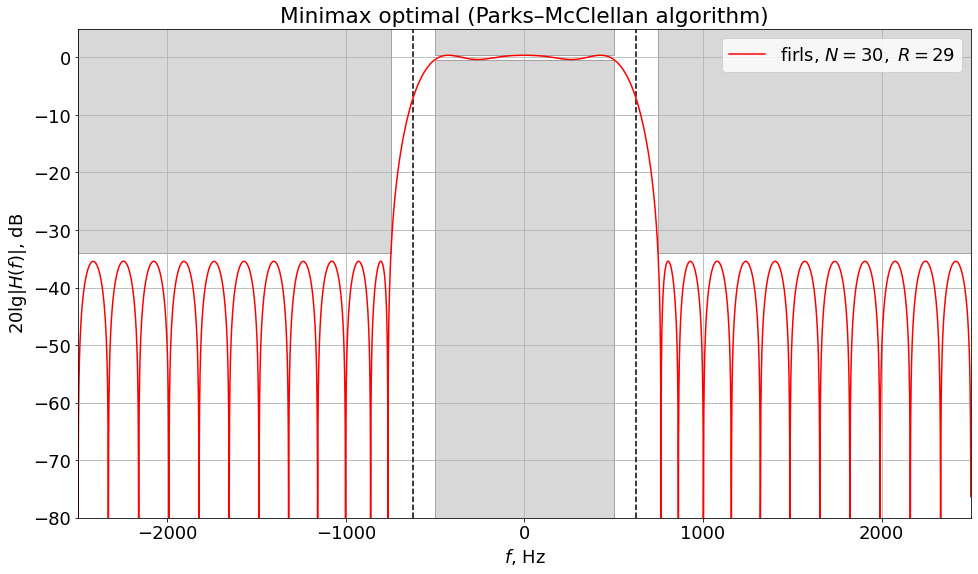

In [34]:
#%matplotlib notebook
fс = (f1+f2)/2
M = 10240
fig, ax = plt.subplots(figsize=(16, 9))
fig.patch.set_facecolor('white')

plt.axvline(+fс, ls = '--', color = 'black')
plt.axvline(-fс, ls = '--', color = 'black')

bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([1/delta1, 1/delta2])
# N = 30 min
N = 30
h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.plot(fs*(np.arange(M)/M-0.5), 20*np.log10(abs(H)), color='red', label = f'firls, $N = {N},\; R = {N-1}$')

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')

plt.title("Minimax optimal (Parks–McClellan algorithm)")
plt.ylim(-80, 5)
plt.grid()
plt.legend(loc='upper right')
plt.show()

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу.


|                                             	| $R_\min$ 	| $N_\min$ 	|
|:---------------------------------------------:|:---------:|:---------:|
| Оконный метод (окно Хэмминга)               	|    55    	|    56   	|
| Оконный метод (окно Кайзера)                	|    37   	|    38 	|
| Метод наименьших квадратов                  	|    40   	|    41   	|
| Метод равномерной чебышевской аппроксимации 	|    29   	|    30   	|

Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).

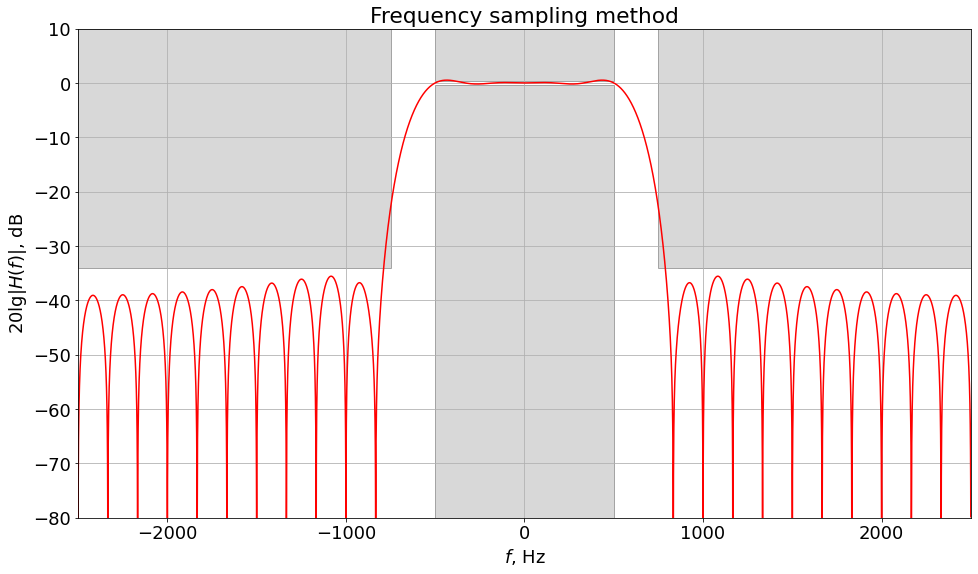

In [35]:
N=30
fc=(f1+f2)/2

fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
H = ideal_lowpass2(fs*(np.arange(N)/N), fs=fs, f1=f1, f2=f2)
h = np.roll(np.fft.ifft(H), N//2)
M = 10240
H1 = abs(np.fft.fft(h, M))
plt.plot(fs*(-0.5 + np.arange(M)/M), 20*np.log10(abs(np.fft.fftshift(H1))), color = 'red')

plt.fill([-f1,-f1, f1, f1], [-100, 20*np.log10(1-delta1), 20*np.log10(1-delta1), -100], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-fs/2,-fs/2, -f2, -f2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([f2,f2, fs/2, fs/2], [20*np.log10(delta2), 10, 10, 20*np.log10(delta2)], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')
plt.fill([-f1,-f1, f1, f1], [10, 20*np.log10(1+delta1), 20*np.log10(1+delta1), 10], 
         edgecolor = 'k', alpha = 0.3, facecolor = 'grey')

plt.title("Frequency sampling method")
plt.xlim(-fs/2., +fs/2.)
plt.ylim(-80, 10)
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")
plt.grid()
plt.show()